In [53]:
import cv2
import os
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt

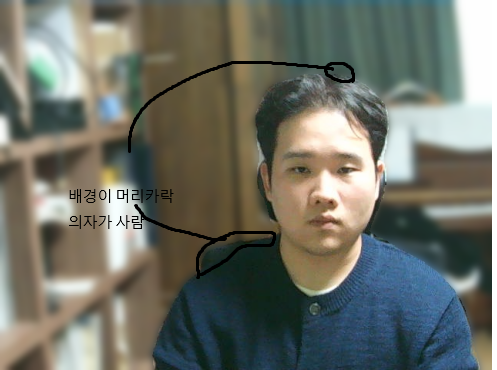

In [ ]:
from IPython.display import Image
Image("output1.png")

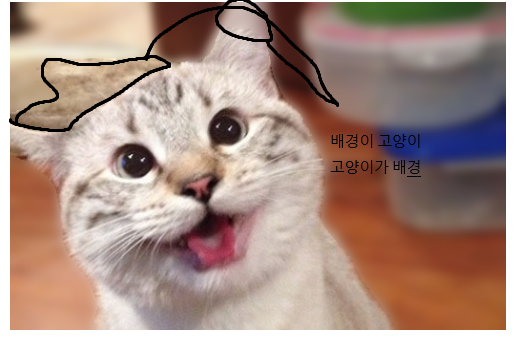

In [ ]:
Image("output.png")

In [54]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [55]:
model = deeplabv3_resnet101(pretrained=True).eval()

In [56]:
transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),
    T.ToTensor(),
])

In [57]:
img_path = "image.jpg"
img_orig = cv2.imread(img_path)
print(f"이미지 크기: {img_orig.shape}")

이미지 크기: (480, 640, 3)


In [58]:
# RGB 변환 및 모델 입력
img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
input_tensor = transform(img_rgb).unsqueeze(0)

In [59]:
with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_resized = cv2.resize(
    output_predictions,
    (img_orig.shape[1], img_orig.shape[0]),
    interpolation=cv2.INTER_NEAREST
)


In [60]:
seg_map = (output_predictions_resized == 15)
img_mask = seg_map.astype(np.uint8) * 255

In [61]:
img_orig_blur = cv2.GaussianBlur(img_orig, (31, 31), 0)

# 마스크를 3채널로 변환
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# 인물은 원본, 배경은 블러 적용
portrait_result = np.where(img_mask_color == 255, img_orig, img_orig_blur)

# 결과 저장 << 굳이 있어야할까
#cv2.imwrite("portrait_mode.jpg", portrait_result)


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) mi

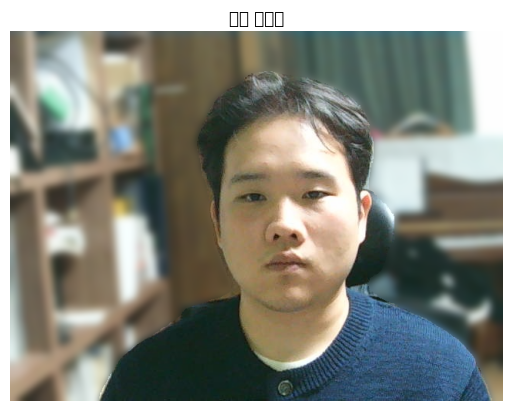

In [62]:
plt.imshow(cv2.cvtColor(portrait_result, cv2.COLOR_BGR2RGB))
plt.title("아웃 포커싱")
plt.axis('off')

In [64]:
cat_img_path = "cat.jpg"
cat_img = cv2.imread(cat_img_path)
print(f"이미지 크기: {cat_img.shape}")

# RGB 변환 및 모델 입력
cat_img_rgb = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
input_tensor_cat = transform(cat_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_cat = model(input_tensor_cat)["out"][0]
    output_predictions_cat = output_cat.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_cat_resized = cv2.resize(
    output_predictions_cat,
    (cat_img.shape[1], cat_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

이미지 크기: (343, 519, 3)


In [65]:
seg_map_cat = (output_predictions_cat_resized == 8)
cat_mask = seg_map_cat.astype(np.uint8) * 255

# 배경 블러 처리
cat_img_blur = cv2.GaussianBlur(cat_img, (31, 31), 0)

# 마스크를 3채널로 변환
cat_mask_color = cv2.cvtColor(cat_mask, cv2.COLOR_GRAY2BGR)

# 고양이는 원본, 배경은 블러 적용
animal_result = np.where(cat_mask_color == 255, cat_img, cat_img_blur)

# 결과 저장
#cv2.imwrite("animal_blur.jpg", animal_result)

(np.float64(-0.5), np.float64(518.5), np.float64(342.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missin

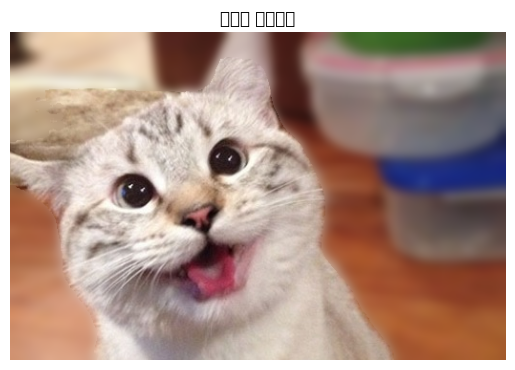

In [66]:
plt.imshow(cv2.cvtColor(animal_result, cv2.COLOR_BGR2RGB))
plt.title("고양이 인물사진")
plt.axis('off')

In [67]:
subject_img_path = "cat.jpg"
background_img_path = "sand.jpg"

subject_img = cv2.imread(subject_img_path)
background_img = cv2.imread(background_img_path)

print(f"객체 이미지 크기: {subject_img.shape}")
print(f"배경 이미지 크기: {background_img.shape}")

# RGB 변환 및 모델 입력
subject_img_rgb = cv2.cvtColor(subject_img, cv2.COLOR_BGR2RGB)
input_tensor_subject = transform(subject_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_subject = model(input_tensor_subject)["out"][0]
    output_predictions_subject = output_subject.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_subject_resized = cv2.resize(
    output_predictions_subject,
    (subject_img.shape[1], subject_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

# 고양이(cat) 클래스 마스크 생성 (클래스 ID = 8)
seg_map_subject = (output_predictions_subject_resized == 8)
subject_mask = seg_map_subject.astype(np.uint8) * 255

# 배경 이미지를 객체 이미지 크기에 맞춤
background_resized = cv2.resize(
    background_img,
    (subject_img.shape[1], subject_img.shape[0])
)

# 마스크를 3채널로 변환
subject_mask_color = cv2.cvtColor(subject_mask, cv2.COLOR_GRAY2BGR)

# 객체는 원본, 배경은 새 배경으로 교체
chroma_result = np.where(subject_mask_color == 255, subject_img, background_resized)


객체 이미지 크기: (343, 519, 3)
배경 이미지 크기: (2000, 3000, 3)


(np.float64(-0.5), np.float64(518.5), np.float64(342.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N

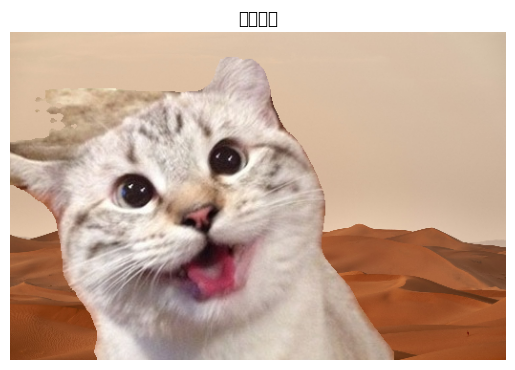

In [68]:
plt.imshow(cv2.cvtColor(chroma_result, cv2.COLOR_BGR2RGB))
plt.title("크로마키")
plt.axis('off')

In [17]:
subject_img_path = "image.jpg"
background_img_path = "sand.jpg"

subject_img = cv2.imread(subject_img_path)
background_img = cv2.imread(background_img_path)

print(f"객체 이미지 크기: {subject_img.shape}")
print(f"배경 이미지 크기: {background_img.shape}")

# RGB 변환 및 모델 입력
subject_img_rgb = cv2.cvtColor(subject_img, cv2.COLOR_BGR2RGB)
input_tensor_subject = transform(subject_img_rgb).unsqueeze(0)

# 세그멘테이션 추론
with torch.no_grad():
    output_subject = model(input_tensor_subject)["out"][0]
    output_predictions_subject = output_subject.argmax(0).byte().cpu().numpy()

# 원본 크기로 리사이즈
output_predictions_subject_resized = cv2.resize(
    output_predictions_subject,
    (subject_img.shape[1], subject_img.shape[0]),
    interpolation=cv2.INTER_NEAREST
)

# 사람(person) 클래스 마스크 생성 (클래스 ID = 15)
seg_map_subject = (output_predictions_subject_resized == 15)
subject_mask = seg_map_subject.astype(np.uint8) * 255

# 배경 이미지를 객체 이미지 크기에 맞춤
background_resized = cv2.resize(
    background_img,
    (subject_img.shape[1], subject_img.shape[0])
)

# 마스크를 3채널로 변환
subject_mask_color = cv2.cvtColor(subject_mask, cv2.COLOR_GRAY2BGR)

# 객체는 원본, 배경은 새 배경으로 교체
chroma_result = np.where(subject_mask_color == 255, subject_img, background_resized)


객체 이미지 크기: (480, 640, 3)
배경 이미지 크기: (2000, 3000, 3)


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) mis

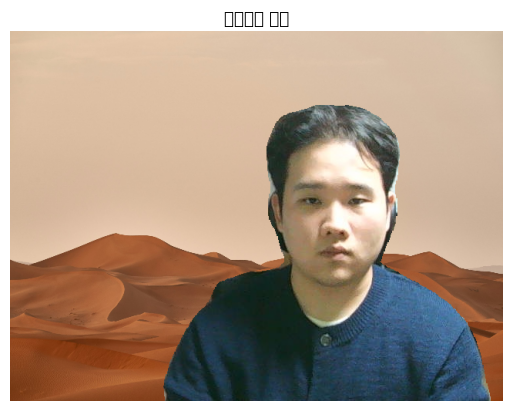

In [ ]:
plt.imshow(cv2.cvtColor(chroma_result, cv2.COLOR_BGR2RGB))
plt.title("크로마키 결과")
plt.axis('off')



In [47]:
import time
input_video_path = "video.mp4"  # 입력 비디오 경로 (또는 0=웹캠)
output_blur_path = "output_blur.mp4"  # 블러 효과 출력 경로
output_chromakey_path = "output_chromakey.mp4"  # 크로마키 효과 출력 경로
background_image_path = "sand.jpg"  # 크로마키용 배경 이미지

target_class = 'person'  # 추출할 객체: 'person', 'cat', 'dog' 등
blur_strength = 33  # 블러 강도 (홀수)

# 클래스 ID 매핑
class_mapping = {
    'person': 15, 'cat': 8, 'dog': 12, 'bird': 3,
    'horse': 13, 'cow': 10, 'sheep': 17
}
target_class_id = class_mapping.get(target_class.lower(), 15)

print(f"  입력 비디오: {input_video_path}")
print(f"  타겟 객체: {target_class} (클래스 ID: {target_class_id})")
print(f"  블러 강도: {blur_strength}")

  입력 비디오: video.mp4
  타겟 객체: person (클래스 ID: 15)
  블러 강도: 33


In [48]:
# 모델 로드
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"디바이스: {device}")

model = deeplabv3_resnet101(pretrained=True).eval().to(device)

transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

디바이스: cuda


In [49]:
# 비디오 캡처 열기
cap = cv2.VideoCapture(input_video_path)

# 비디오 정보
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"  해상도: {width}x{height}")
print(f"  FPS: {fps}")

# 배경 이미지 로드 (크로마키용)

background_img = cv2.imread(background_image_path)

# 비디오 크기에 맞춤
background_img = cv2.resize(background_img, (width, height))
print(f"  배경 이미지: {background_image_path}")

  해상도: 640x480
  FPS: 30
  배경 이미지: sand.jpg


In [51]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out_blur = cv2.VideoWriter(output_blur_path, fourcc, fps, (width, height))
out_chromakey = cv2.VideoWriter(output_chromakey_path, fourcc, fps, (width, height))


# 비디오 처리 시작

frame_count = 0
start_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # RGB 변환
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # 모델 입력 준비
    input_tensor = transform(frame_rgb).unsqueeze(0).to(device)

    # 세그멘테이션 추론
    with torch.no_grad():
        output = model(input_tensor)["out"][0]
        predictions = output.argmax(0).byte().cpu().numpy()

    # 원본 크기로 리사이즈
    predictions_resized = cv2.resize(
        predictions,
        (width, height),
        interpolation=cv2.INTER_NEAREST
    )

    # 타겟 객체 마스크 생성
    seg_map = (predictions_resized == target_class_id)
    mask = seg_map.astype(np.uint8) * 255

    # 마스크를 3채널로 변환
    mask_3ch = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

   # 효과 1: 배경 블러
    frame_blur = cv2.GaussianBlur(frame, (blur_strength, blur_strength), 0)
    result_blur = np.where(mask_3ch == 255, frame, frame_blur)

    # 효과 2: 배경 크로마키
    result_chromakey = np.where(mask_3ch == 255, frame, background_img)

    # 진행 상황 표시
    progress = (frame_count / total_frames) * 100 if total_frames > 0 else 0

    # 진행률 출력
    if frame_count % 30 == 0:
        elapsed = time.time() - start_time
        fps_current = frame_count / elapsed
        eta = (total_frames - frame_count) / fps_current if fps_current > 0 else 0
        print(f"  진행: {frame_count}/{total_frames} "
              f"({progress:.1f}%) | "
              f"처리 속도: {fps_current:.2f} FPS | "
              f"남은 시간: {eta:.1f}초")


# 리소스 해제

cap.release()
out_blur.release()
out_chromakey.release()

# 완료 통계
elapsed_total = time.time() - start_time
avg_fps = frame_count / elapsed_total if elapsed_total > 0 else 0



처리 시작...
  진행: 30/604 (5.0%) | 처리 속도: 28.30 FPS | 남은 시간: 20.3초
  진행: 60/604 (9.9%) | 처리 속도: 28.34 FPS | 남은 시간: 19.2초
  진행: 90/604 (14.9%) | 처리 속도: 28.17 FPS | 남은 시간: 18.2초
  진행: 120/604 (19.9%) | 처리 속도: 28.39 FPS | 남은 시간: 17.0초
  진행: 150/604 (24.8%) | 처리 속도: 28.44 FPS | 남은 시간: 16.0초
  진행: 180/604 (29.8%) | 처리 속도: 28.50 FPS | 남은 시간: 14.9초
  진행: 210/604 (34.8%) | 처리 속도: 28.57 FPS | 남은 시간: 13.8초
  진행: 240/604 (39.7%) | 처리 속도: 28.65 FPS | 남은 시간: 12.7초
  진행: 270/604 (44.7%) | 처리 속도: 28.73 FPS | 남은 시간: 11.6초
  진행: 300/604 (49.7%) | 처리 속도: 28.80 FPS | 남은 시간: 10.6초
  진행: 330/604 (54.6%) | 처리 속도: 28.85 FPS | 남은 시간: 9.5초
  진행: 360/604 (59.6%) | 처리 속도: 28.86 FPS | 남은 시간: 8.5초
  진행: 390/604 (64.6%) | 처리 속도: 28.87 FPS | 남은 시간: 7.4초
  진행: 420/604 (69.5%) | 처리 속도: 28.84 FPS | 남은 시간: 6.4초
  진행: 450/604 (74.5%) | 처리 속도: 28.81 FPS | 남은 시간: 5.3초
  진행: 480/604 (79.5%) | 처리 속도: 28.80 FPS | 남은 시간: 4.3초
  진행: 510/604 (84.4%) | 처리 속도: 28.83 FPS | 남은 시간: 3.3초
  진행: 540/604 (89.4%) | 처리 속도: 28.87 FPS | 남은 시간: 